# Humic Acid Testing in Different Solvents
Created by Hans Gaensbauer for the MIT Climate and Sustainability Consortium </br>4-6-2023

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from NMR import JEOL_parser as jeol

In [4]:
initial_concentration = 1

ns = 2
cutoff = 19
dlen = 39328
data = np.zeros((ns, dlen), dtype = np.complex128)
zero_point = 0
base_freq = 0

folder = "../data/nmr_data/"

data[0] = jeol.get_1d_data((folder + "HA-Methanol_CARBON-2-1.jdf"))
data[1] = jeol.get_1d_data((folder + "HA-Chloroform_CARBON-2-1.jdf"))

zero_point = jeol.get_header(folder + "HA-Methanol_CARBON-2-1.jdf")["Zero_Point"][0]
base_freq = jeol.get_header(folder + "HA-Methanol_CARBON-2-1.jdf")["Base_Freq"][0]
    
t = jeol.get_ruler(folder + "HA-Methanol_CARBON-2-1.jdf")

<IPython.core.display.Javascript object>


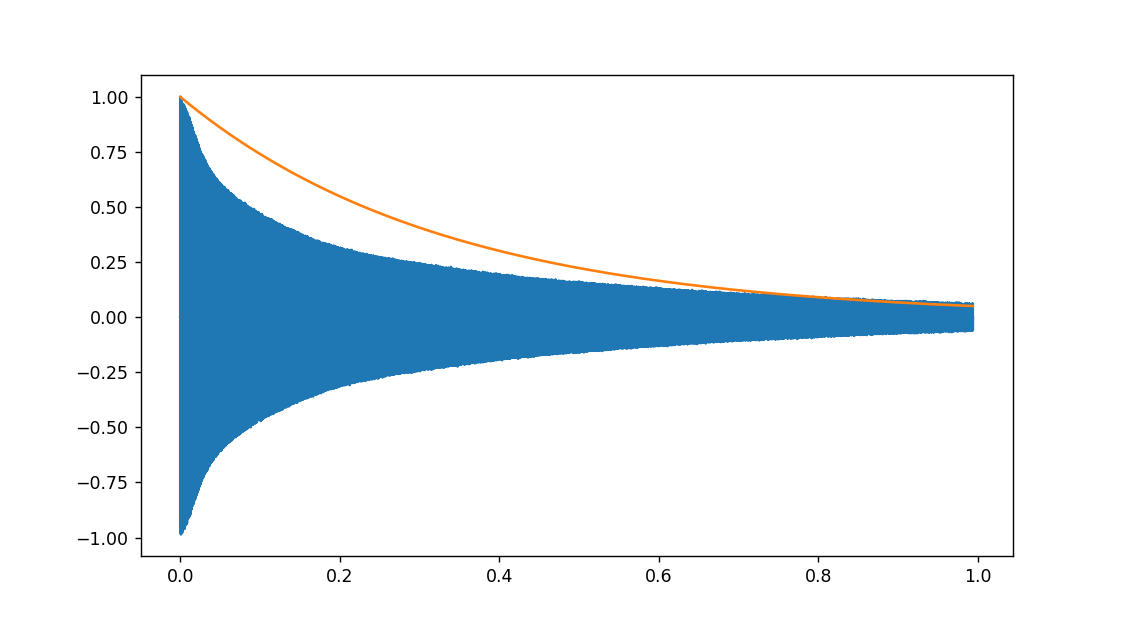

In [5]:
#Set the spectral width
sexp = np.exp(-3*(t-t[0]))

#plot the exponential with one of the FIDs
sexp_plot = plt.figure(figsize=(9,5))
plt.plot(t, np.real(data[0])/np.real(data[0]).max())
plt.plot(t, sexp)

<IPython.core.display.Javascript object>


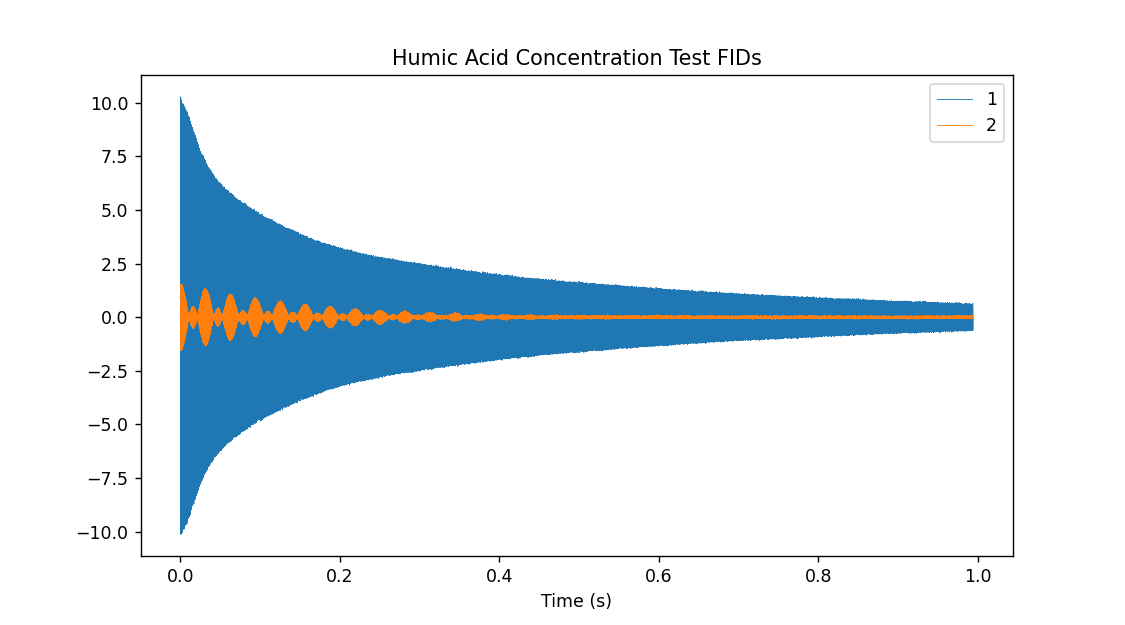

In [7]:
#plim = 128

#plot the FIDs
fid_plot = plt.figure(figsize=(9,5))
for i in range(ns):
    plt.plot(t[:], np.real(data[i][:]), linewidth=0.5)
    
plt.legend([("%d" % (i+1)) for i in range(ns)])
#plt.ylim([0.1, -0.1])
plt.title("Humic Acid Concentration Test FIDs")
plt.xlabel("Time (s)")
plt.show()

<IPython.core.display.Javascript object>


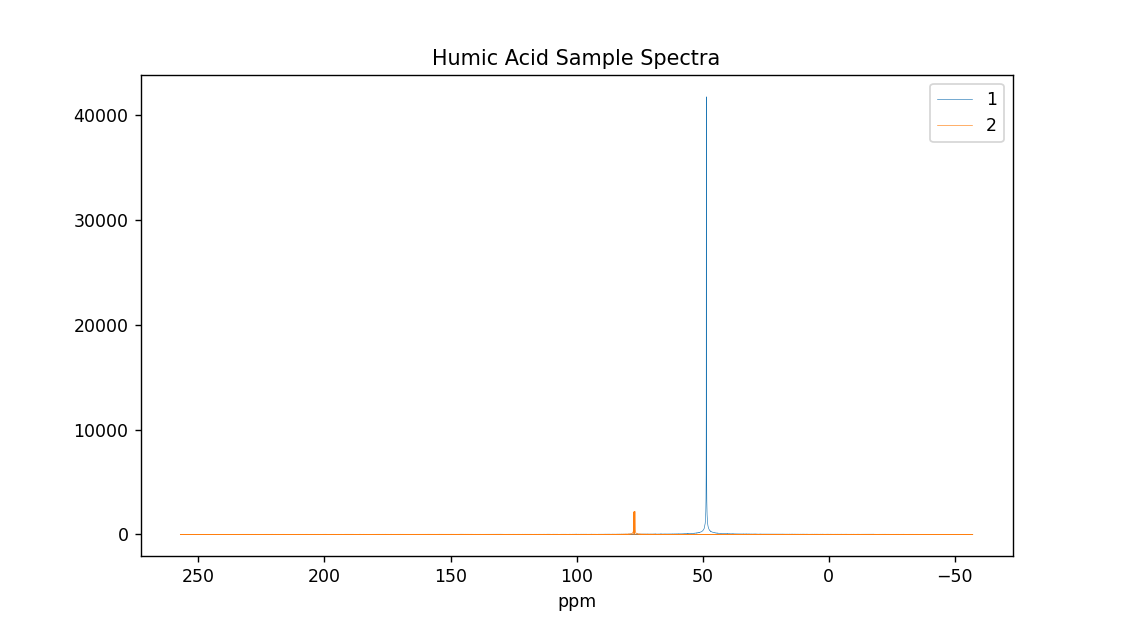

In [13]:
spectra = np.zeros((ns, dlen), dtype = np.complex128)
ppm = np.zeros((ns, dlen))

#Create Spectra
for i in range(ns):
    spectra[i] = np.fft.fft(data[i] * sexp)
    ppm[i] = (zero_point/(t[1]-t[0]) - np.fft.fftfreq(len(data[i]), t[1]-t[0]))/base_freq #Convert to ppm

spec_plot = plt.figure(figsize=(9,5))
for i in range(ns):
    plt.plot(ppm[i], np.abs(spectra[i]), linewidth=0.35)
    
plt.legend([("%d" % (i+1)) for i in range(ns)])
plt.gca().invert_xaxis()
plt.title("Humic Acid Sample Spectra")
plt.xlabel("ppm")
plt.show()